In [7]:
# Import libraries
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.saving import load_model

In [8]:
# Set directories
root_dir = os.getcwd()
data_dir = os.path.join(root_dir, "mosquitoes-dataset")
model_dir = os.path.join(root_dir, "models")
test_dir = os.path.join(root_dir, "test-dataset")

In [9]:
# Class names
class_names = os.listdir(data_dir)

In [10]:
model = load_model(os.path.join(model_dir, "mosquitoes_model.keras"))

In [11]:
IMG_DIM = 224
IMG_SIZE = (IMG_DIM, IMG_DIM)
IMG_SHAPE = IMG_SIZE + (3,)

1/1 [==============================] - 0s 94ms/step
[0.3530982 0.6469018]


(-0.5, 499.5, 276.5, -0.5)

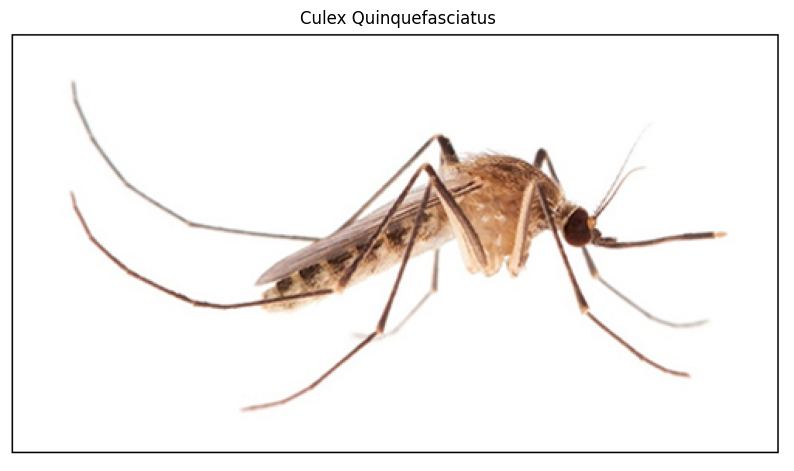

In [12]:
plt.figure(figsize=(10, 10))
img = cv2.imread(os.path.join(test_dir, 'Culex Quinquefasciatus', 'culex-1.jpg'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
x = cv2.resize(img, IMG_SIZE, interpolation=cv2.INTER_LINEAR)
x = np.expand_dims(x/255, 0)

yhat = model.predict(x)
yhat = tf.nn.softmax(yhat[0])
yhat = np.array(yhat)

print(yhat)

plt.imshow(img.astype('uint8'))
plt.title(class_names[np.argmax(yhat)])
plt.axis("off")